<a href="https://colab.research.google.com/github/dourivaljunior/estudos-de-caso/blob/main/loan_prediction_problem_aplicado_ao__metodo_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving loan_prediction_data_pre_processing.csv to loan_prediction_data_pre_processing.csv


In [ ]:
# reading the loan prediction data
df = pd.read_csv('loan_prediction_data_pre_processing.csv')

In [ ]:
# reading the loan prediction data
df=pd.read_csv('loan_prediction_data_pre_processing.csv')
df=df.drop('Loan_ID',axis=1)

(420, 12) (180, 12)
(180, 11) (180,)
(13, 11) (13,)
(57, 12) (363, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


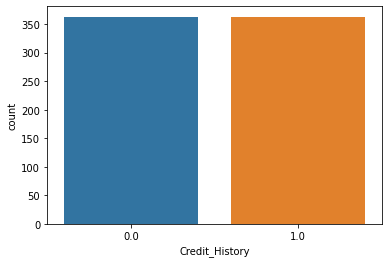

(726, 12)

random forest               precision    recall  f1-score   support

         0.0       0.94      0.51      0.66        57
         1.0       0.81      0.98      0.89       123

    accuracy                           0.83       180
   macro avg       0.87      0.75      0.77       180
weighted avg       0.85      0.83      0.82       180



In [ ]:
#separando dois conjuntos; 420 dados para treino e 180 dados para o teste e 13 para verificação
#criando os conjuntos de treino e de teste
columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
         'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
data_train=df[0:420]      
data_test=df[420:600] 
print(data_train.shape,data_test.shape)  
x_test=(data_test[columns])
y_test=(data_test['Loan_Status'])
print(x_test.shape,y_test.shape)
#usar dados novos para fazer previsões novas para o modelo.
x_new_test=(df[columns]).iloc[600:613]
y_new_test=(df['Loan_Status']).iloc[600:613]
print(x_new_test.shape,y_new_test.shape)
# realizando o balanceamento das classes da varíavel 'Credit_History'
from sklearn.utils import resample
data_train_classe_minoritaria=data_train[data_train.Credit_History==0]
data_train_classe_majoritaria=data_train[data_train.Credit_History==1]
num=len(data_train_classe_majoritaria)
print(data_train_classe_minoritaria.shape,data_train_classe_majoritaria.shape)
data_train_classe_minoritaria_upsampled=resample(data_train_classe_minoritaria,replace = True,n_samples =num,random_state = 25)
data_train_balanceados = pd.concat([data_train_classe_majoritaria,data_train_classe_minoritaria_upsampled])
sns.countplot(data_train_balanceados['Credit_History'])
plt.show()
display(data_train_balanceados.shape)
x_train=data_train_balanceados[columns]
y_train=data_train_balanceados['Loan_Status']
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model3 = RandomForestClassifier(n_estimators=500,max_depth=3)
model3.fit(x_train, y_train)
predict = model3.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
Matriz_Confusao3=confusion_matrix(y_test,predict)
#sns.heatmap(Matriz_Confusao3, annot=True)
from sklearn.metrics import classification_report
print('random forest', classification_report(y_test,predict))

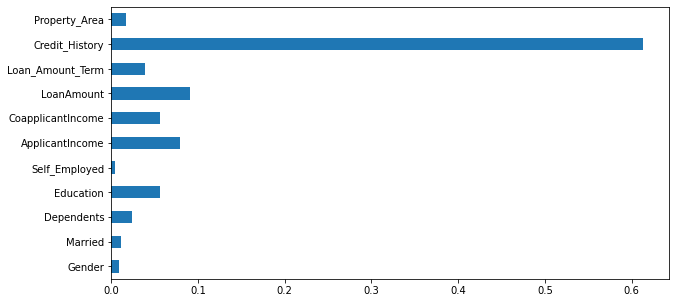

In [ ]:
x=df.drop('Loan_Status',axis=1)
importances=pd.Series(model3.feature_importances_, index=x.columns)
importances.plot(kind='barh',figsize=(10,5))